In [34]:
import pandas as pd
import warnings

In [24]:
dataset = pd.read_csv('data.csv',encoding = 'unicode_escape')
data = pd.DataFrame(dataset)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [27]:
print(f'Information:\n {data.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
Information:
 None


In [28]:
missing_data = data.isnull().sum()
missing_data

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [35]:
data = data.dropna(subset=['CustomerID'])
data['Description'].fillna('Unknown', inplace=True)

In [36]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [37]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')
data['InvoiceDate'].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

**Product Analysis**

In [38]:
#What are the top 10 most frequently purchased products?
product_frequency = data.groupby('StockCode')['Quantity'].sum()
product_frequency = product_frequency.sort_values(ascending=False)
top_10_products = product_frequency.head(10)
print("Top 10 most frequently purchased products:\n", top_10_products)

Top 10 most frequently purchased products:
 StockCode
84077     53215
22197     48712
85099B    45066
84879     35314
85123A    34204
21212     33409
23084     27094
22492     25880
22616     25321
21977     24163
Name: Quantity, dtype: int64


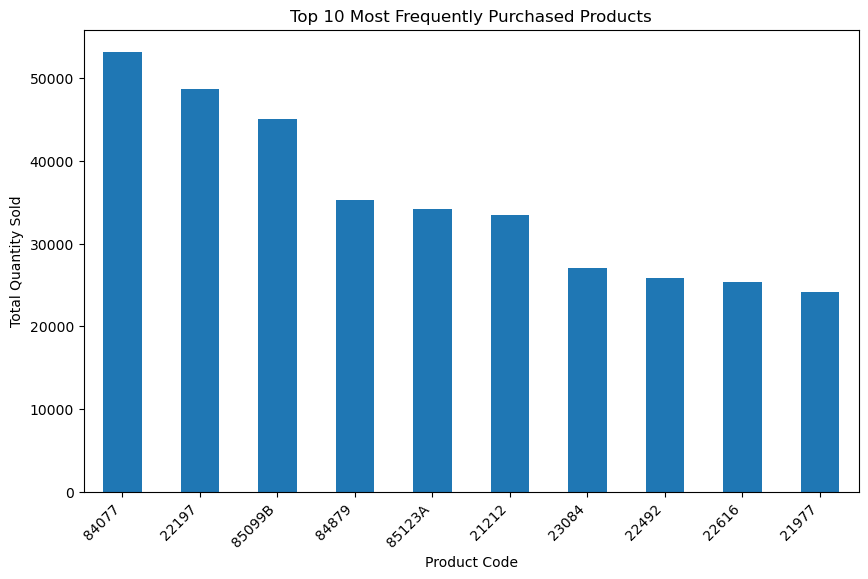

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_10_products.plot(kind='bar')
plt.title('Top 10 Most Frequently Purchased Products')
plt.xlabel('Product Code')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

In [42]:
#What is the average price of products in the dataset?
avg = data['UnitPrice'].mean()
print("Average price of products:", avg)

Average price of products: 3.460471018536043


In [47]:
#Can you find out which product category generates the highest revenue

data['TotalRevenue'] = data['Quantity'] * data['UnitPrice']
category_revenue = data.groupby('StockCode')['TotalRevenue'].sum()

highest_revenue_category = category_revenue.idxmax()
highest_revenue_value = category_revenue.max()

print("Product category with the highest revenue:", highest_revenue_category)
print("Total revenue for the category:", highest_revenue_value)

Product category with the highest revenue: 22423
Total revenue for the category: 132870.4


**Time Analysis**

Thursday     82374
Wednesday    70599
Tuesday      68110
Monday       66382
Sunday       63237
Friday       56127
Name: DayOfWeek, dtype: int64
12    73342
13    65062
14    55075
11    50249
15    46220
10    38951
16    24997
9     22464
17    13734
8      8792
19     3511
18     3137
20      871
7       383
6        41
Name: HourOfDay, dtype: int64


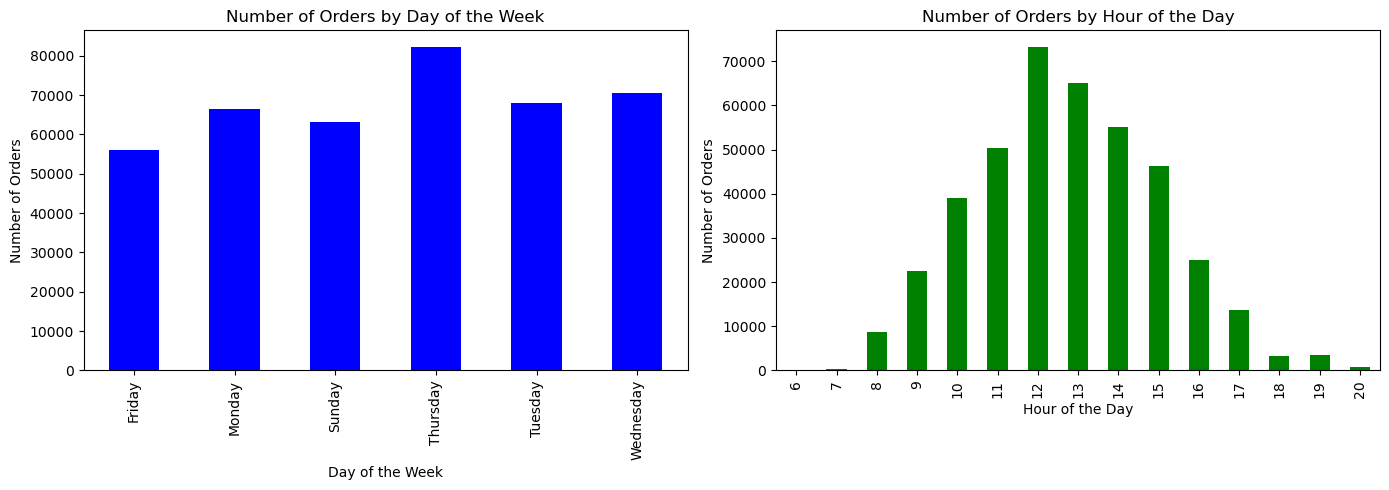

In [62]:
#Is there a specific day of the week or time of day when most orders are placed?

data['DayOfWeek'] = data['InvoiceDate'].dt.day_name()
data['HourOfDay'] = data['InvoiceDate'].dt.hour

orders_by_day = data['DayOfWeek'].value_counts()
orders_by_hour = data['HourOfDay'].value_counts()
print(orders_by_day)
print(orders_by_hour)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
orders_by_day.sort_index().plot(kind='bar', color='blue')
plt.title('Number of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')

plt.subplot(1, 2, 2)
orders_by_hour.sort_index().plot(kind='bar', color='green')
plt.title('Number of Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [58]:
#What is the average order processing time?
#cannot be determined

Year  Month
2010  12        554604.020
2011  1         475074.380
      2         436546.150
      3         579964.610
      4         426047.851
      5         648251.080
      6         608013.160
      7         574238.481
      8         616368.000
      9         931440.372
      10        974603.590
      11       1132407.740
      12        342506.380
Name: TotalRevenue, dtype: float64


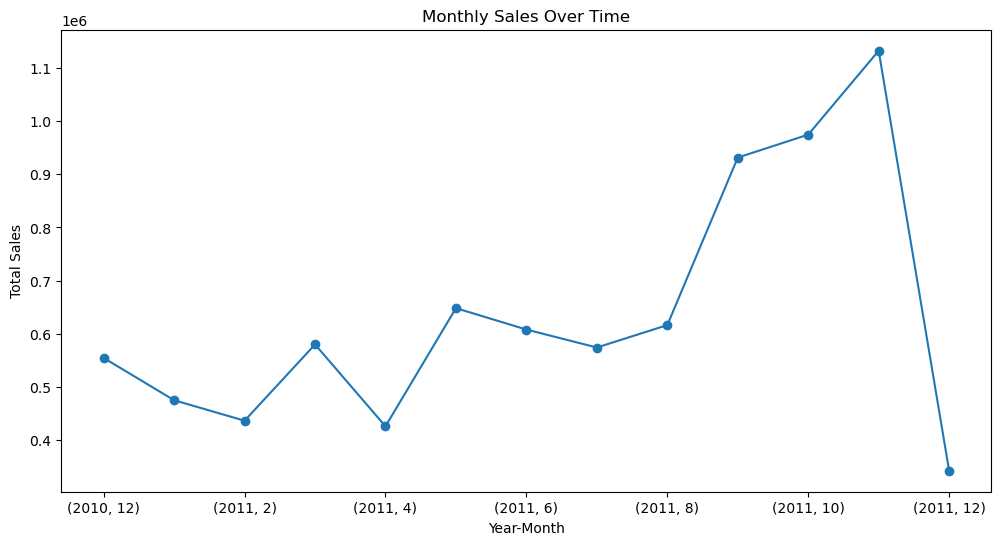

In [63]:
#Are there any seasonal trends in the dataset?
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['DayOfWeek'] = data['InvoiceDate'].dt.day_name()

monthly_sales = data.groupby(['Year', 'Month'])['TotalRevenue'].sum()
print(monthly_sales)

plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.show()